# Classifying Iris Flowers using Machine Learning

### By Adam Richman

Today, we’re diving into the classic Iris dataset to explore how machine learning can classify different species of Iris flowers. Whether you’re new to data science or a seasoned pro revisiting a favorite, this project is a perfect blend of simplicity and insight.

## Introduction to the Iris Dataset

The Iris dataset is a cornerstone of machine learning. It contains 150 samples across three species (Setosa, Versicolor, and Virginica) each with four features per sample (sepal length, sepal width, petal length, and petal width (all in centimeters)). Our mission? Build a model to predict the species based on these measurements. It’s a small, balanced dataset (50 samples per species), making it ideal for learning.

## 1. Imports
Load the necessary python packages

In [26]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

# Machine learning tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## 2. Loading data
After loading the Iris dataset and turning it into a Pandas DataFrame, we can peek at the first few rows to view the data structure.

In [27]:
# load iris dataset
data = load_iris()

# convert to DataFrame for easy handling
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# display first five rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Exploratory data analysis (EDA)
EDA is where we get to know our data, looking at feature stats and visualizing the data. 

In [28]:
# summary stats
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A few noteworthy stats from the data:
- petal length ranges from 1cm to 6.9cm which is a pretty wide spread
- petal width ranges from 0.1cm to 2.5cm (also fairly large)
- sepal width has a small range from 2cm to 4.4cm

### Visualizing relationships
Visualizations can highlight how features distinguish species.

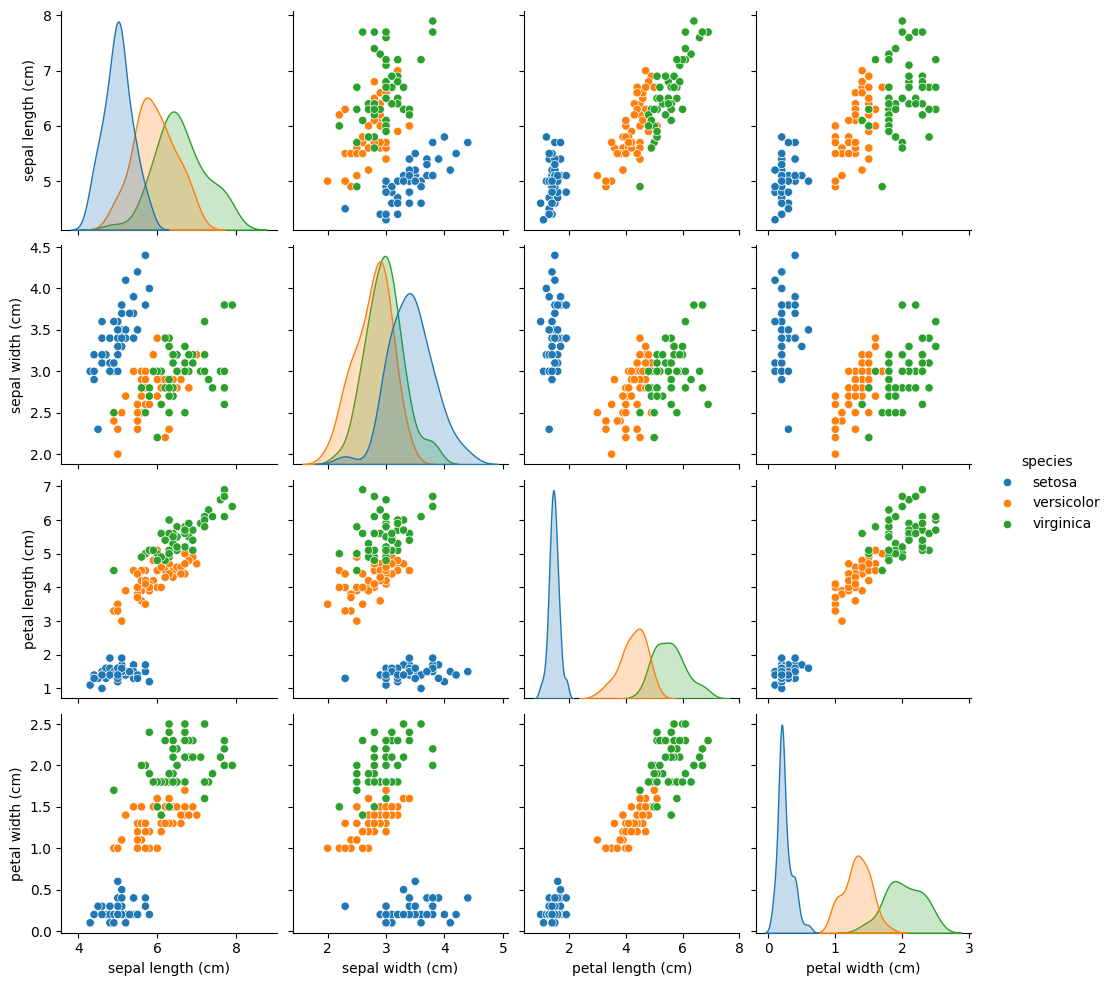

In [29]:
# pairplot to visualize relationships
sns.pairplot(df, hue='species')
plt.show()

The pair plot shows scatter plots for every feature pair, colored by species. Setosa stands out distinctly from the other species, while Versicolor and Virginica overlap a bit, which our model will need to tackle.

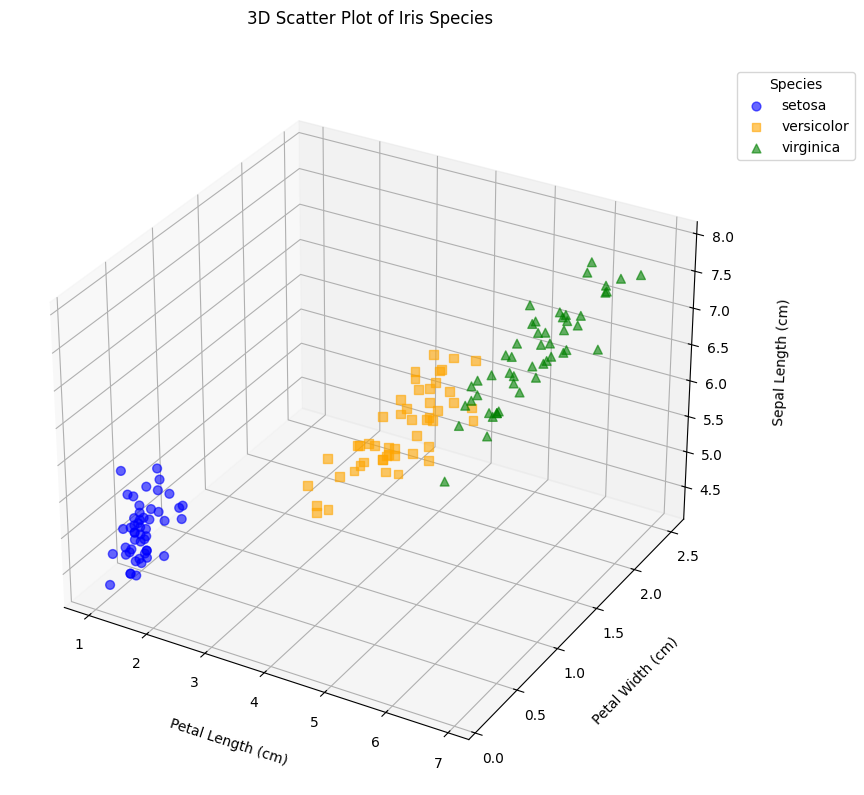

In [57]:
# 3d scatter plot
# visualize petal length, petal width, and sepal length
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

markers = {'setosa': 'o', 'versicolor': 's', 'virginica': '^'}
colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}

for species, marker in markers.items():
    subset = df[df['species'] == species]
    ax.scatter(subset['petal length (cm)'],
               subset['petal width (cm)'],
               subset['sepal length (cm)'],
               marker=marker,
               label=species,
               color=colors[species],
               s=40,
               alpha=0.6)

ax.set_xlabel('Petal Length (cm)', labelpad=15)
ax.set_ylabel('Petal Width (cm)', labelpad=15)
ax.set_zlabel('Sepal Length (cm)', labelpad=20)
ax.set_title('3D Scatter Plot of Iris Species', pad=30)
ax.legend(title='Species', loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0.05, right=0.85, bottom=0.05, top=0.95)
plt.show()

This 3D view reinforces Setosa’s separation and the closer clustering of Versicolor and Virginica.

## 4. Data processing
Before modeling, we need to prep the data. Preprocessing ensure that the data is structured appropriately for modeling. We'll use a 70-30 split for training and testing.

In [31]:
# separating features and target
X = df[data.feature_names]
y = df['species']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Since I plan to use K-Nearest Neighbors (KNN), which utilizes distances between data points, we'll scale the data to standardize the influence of distance.

In [32]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model training: k-nearest neighbors
KNN classifies by finding the nearest neighbors. But the number of neighbors in order to classify will need to be finely tuned to properly classify each point.

In [33]:
# define parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# perform grid search with cross-validation
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)

# best parameters
print(f"Best parameters: {gs_knn.best_params_}")
print(f"Best score: {gs_knn.best_score_:.4f}")

Best parameters: {'n_neighbors': 5}
Best score: 0.9667


`cv=5` means that the model tests a 5-fold cross-validation. In other words, the training data is split into 5 parts to find the most appropriate k value.

The grid search results show that the optimal number of neighbors is `k=5` (5 neighbors), yielding a nearly 97% accuracy on the validation set.

## 6. Model evaluation
Now that we know how many neighbors is optimal, we apply and evaluate the best model on the test set to make predictations for each data point's classification.

In [34]:
# get the best model
best_knn = gs_knn.best_estimator_

# make predictions
y_pred = best_knn.predict(X_test_scaled)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



The classification report gives stats regarding how accurate the model is, showing us that this model has a 93% accuracy on the test set, but slight confusion when distinguishing Versicolor and Virginica.

Precision measures correct predictions per class, recall measures captured instances, and F1-score balances both precision and recall, which is crucial for understanding errors between Versicolor and Virginica.

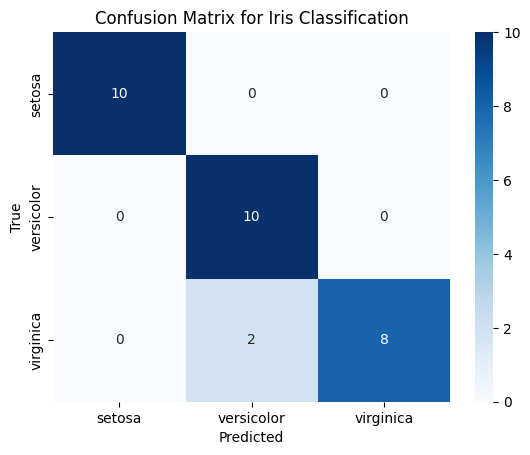

In [35]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

Most errors, if any, will be between Versicolor and Virginica which is consistent with our EDA.

## 7. Conclusion
We’ve classified Iris flowers using KNN, achieving around 93% accuracy. We explored the data, preprocessed it, tuned our model, and evaluated its performance. Setosa was a breeze to classify, while Versicolor and Virginica challenged us a bit due to their overlap.

As always, additional modeling with logistic regression, decision trees, tweaking the KNN distancing metric, etc. may produce different results!